In [401]:
import numpy as np
import pandas as pd
pd.set_option('max_column', 999)
import regex as re
import requests
from requests.auth import HTTPBasicAuth, HTTPProxyAuth
from bs4 import BeautifulSoup
import mechanize
import zipfile
import time
import os
from urllib.error import HTTPError
from tqdm import tqdm
from itertools import cycle
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, cv, Pool
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
files_dir = 'C:\\Users\\razum\\Python\\Houses\\'#'Houses/'

In [5]:
mkd_df = pd.read_csv(files_dir + 'mkd_df.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
mkd_df.sample(5)

,id,region_id,area_id,city_id,street_id,shortname_region,formalname_region,shortname_area,formalname_area,shortname_city,formalname_city,shortname_street,formalname_street,house_number,building,block,letter,address,houseguid,management_organization_id,built_year,exploitation_start_year,project_type,house_type,is_alarm,method_of_forming_overhaul_fund,floor_count_max,floor_count_min,entrance_count,elevators_count,energy_efficiency,quarters_count,living_quarters_count,unliving_quarters_count,area_total,area_residential,area_non_residential,area_common_property,area_land,parking_square,playground,sportsground,other_beautification,foundation_type,floor_type,wall_material,basement_area,chute_type,chute_count,electrical_type,electrical_entries_count,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,file
432455,7561916,15784a67-8cea-425b-834a-6afe0e3ed61c,e5525f12-cd73-48ee-8855-14edf150ec96,14c73394-b886-40a9-9e5c-547cfd4d6aad,33e08a1e-e12c-41fc-bc67-b4aea600c9a1,обл,Костромская,р-н,Костромской,г,Кострома,ул,Клубничная,6,NaN,NaN,NaN,"обл. Костромская, р-н. Костромской, г. Костром...",0a8ff4e4-ba5d-47b2-ab92-e87c8c438c4c,8939623.0,2001.0,2001.0,КС-121-43-5/1-ДС типовой проект,Многоквартирный дом,Нет,На специальном счете у регионального оператора,5.0,5.0,1.0,0.0,Не присвоен,20,20.0,0.0,1257.97,1076.46,0.0,181.51,1675.25,"131,00",499,500,отсутствует,Ленточный,Железобетонные,Панельные,293.02,Отсутствует,0.0,Центральное,1.0,Центральное,Закрытая с приготовлением горячей воды на ИТП,Центральное,Центральное,"0,00",Центральное,Вытяжная вентиляция,Отсутствует,Внутренние водостоки,export-reestrmkd-44-20211001.csv
439298,9368465,4a3d970f-520e-46b9-b16c-50d4ca7535a8,NaN,3bbda77d-ba3f-4457-9d44-c440815cda89,e1691fc3-6945-4ef7-b150-0e70b5c5059c,обл,Курганская,NaN,NaN,г,Курган,ул,Джамбула,22,NaN,NaN,NaN,"обл. Курганская, г. Курган, ул. Джамбула, д. 22",ec8fc099-20e8-48fb-b46e-53ac89a230ca,NaN,NaN,NaN,NaN,Не заполнено,Да,Не заполнено,NaN,NaN,NaN,NaN,Не заполнено,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498,498,NaN,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,NaN,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,NaN,Не заполнено,Не заполнено,Не заполнено,Не заполнено,export-reestrmkd-45-20211001.csv
912898,7688717,0c5b2444-70a0-4932-980c-b4dc0d3f02b5,NaN,NaN,53ce7c79-c278-4f29-b804-7ef9ca96f6dc,г,Москва,NaN,NaN,NaN,NaN,ул,Молодогвардейская,47,NaN,3,NaN,"г. Москва, ул. Молодогвардейская, д. 47, к. 3",b94ff809-00df-46c9-8bdb-aa105d42e9ea,7629106.0,1970.0,1970.0,индивидуальный проект,Многоквартирный дом,Нет,На счете регионального оператора,5.0,0.0,4.0,0.0,Не заполнено,80,80.0,0.0,3406.10,3406.10,0.0,0.00,4952.00,"95,00",499,500,NaN,Ленточный,Железобетонные,Кирпич,908.00,Отсутствует,0.0,Центральное,2.0,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,"0,00",Центральное,Приточно-вытяжная вентиляция,Отсутствует,Наружные водостоки,export-reestrmkd-77-20211001.csv
1004640,9331361,6fdecb78-893a-4e3f-a5ba-aa062459463b,NaN,NaN,a857ccaa-8f2b-4719-99c0-142b96f9738b,г,Севастополь,NaN,NaN,NaN,NaN,ул,Советская,55 а,NaN,NaN,NaN,"г. Севастополь, ул. Советская, д. 55 а",6f7c520c-2696-4a62-8653-0f20b313e2dc,8919424.0,1911.0,1955.0,каменный,Многоквартирный дом,Нет,На счете регионального оператора,2.0,0.0,1.0,0.0,C,5,5.0,0.0,488.00,324.70,0.0,163.30,645.00,"0,00",500,500,отсутствует,Ленточный,Деревянные,Кирпич,147.20,Отсутствует,0.0,Центральное,1.0,Центральное,Квартирное (квартирный котел),Центральное,Центральное,"0,00",Центральное,Приточная вентиляция,Отсутствует,Наружные водостоки,export-reestrmkd-92-20211001.csv
599444,8461121,05426864-466d-41a3-82c4-11e61cdc98ce,NaN,140e31da-27bf-4519-9ea0-6185d681d44e,047cc685-41ee-40dd-adb8-e6ecc3f4f753,обл,Омская,NaN,NaN,г,Омск,ул,Молодогвардейская,9,NaN,NaN,NaN,"обл. Омская, г. Омск, ул. Молодогвардейская, д. 9",2316f000-eeaf-4315-a712-674737c2a85c,8456838.0,1968.0,1968.0,II-17,Многоква

In [7]:
uo_df = pd.concat([pd.read_csv(files_dir + 'export-reestruo-00-20211001.csv', sep = ';')[['id','inn']],
                  pd.read_csv(files_dir + 'inn_id_link.csv')[['id','inn']]])\
.drop_duplicates().reset_index(drop=True)

In [8]:
uo_df.sample(5)

,id,inn
60982,7700427,3525112020
34347,6757171,1646010453
54375,8937672,278930915
5554,8074028,7725796400
11334,7765629,7804316712


In [9]:
rusprofile_uo_df = pd.read_csv(files_dir + 'rusprofile_uo_df.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
def coop_flg(s):
    x = str(s).upper()
    return int(('ЖИЛИЩ' in x) & ('КООП' in x) | ('ЖСК' in x) 
               | ('ТОВАР' in x) & ('СОБСТВ' in x) | ('ТСЖ' in x) | ('ТСН' in x))

In [11]:
def rusdate(s):
    try:
        t = s.split()
        rep = {'января':'01','февраля':'02','марта':'03','апреля':'04','мая':'05','июня':'06',
              'июля':'07','августа':'08','сентября':'09','октября':'10','ноября':'11','декабря':'12'}
        x = t[0] + '.' + rep[t[1]] + '.' +t[2]
        return datetime.strptime(x,'%d.%m.%Y')
    except:
        return datetime(1990, 1, 1, 0, 0)

In [12]:
rusprofile_uo_df['regdate'] = rusprofile_uo_df['date_reg'].apply(rusdate)
rusprofile_uo_df['coop_flg'] = rusprofile_uo_df['company_name'].apply(coop_flg)

In [13]:
rusprofile_uo_df.sample(5)

,rusprofile_id,company_name,inn,ogrn,date_reg,address,url,id,regdate,coop_flg
147348,8540412,"ТСЖ ""Прайд""",1513048024,1141513002058,24 апреля 2014 г.,"362007, Республика Северная Осетия - Алания, г...",https://www.rusprofile.ru/codes/683200/364,NaN,2014-04-24,1
84916,3087262,"ЖСК ""Белое Озеро""",7017094190,1047000128295,6 мая 2004 г.,"634062, Томская область, город Томск, улица Ив...",NaN,NaN,2004-05-06,1
62093,461170,"ООО УК ""Квартал Преображенский""",7017094507,1047000132376,13 мая 2004 г.,"656008, Алтайский край, город Барнаул, Колхозн...",NaN,NaN,2004-05-13,0
177413,5789036,"ООО ""Металлика""",7721745250,5117746034599,19 декабря 2011 г.,"109202, город Москва, шоссе Фрезер, дом 5/1, п...",https://www.rusprofile.ru/codes/683200/663,NaN,2011-12-19,0
32491,3504066,"ТСЖ ""Просвещенец - 2""",7606012769,1027600852443,19 декабря 2002 г.,"150054, Ярославская область, город Ярославль, ...",NaN,8574168.0,2002-12-19,1


In [14]:
uo_df = uo_df.merge(rusprofile_uo_df[['inn','regdate','coop_flg','company_name']], how = 'left', on = 'inn')

In [15]:
uo_df.sample(5)

,id,inn,regdate,coop_flg,company_name
28687,7617875,2511073147,2011-01-28,0.0,"ООО ""Виктория"""
16574,8917150,2311103210,2007-10-23,1.0,"ТСЖ ""Авангард"""
39701,8930797,6451006630,2015-05-06,1.0,"ТСН ""Возрождение-2015"""
17226,7809256,2310138877,2009-05-21,1.0,"ТСЖ ""Покровское"""
35726,8930227,6143049929,2001-10-31,1.0,"ТСЖ ""Весна Дона"""


In [16]:
uo_hist_df = pd.concat([pd.read_csv(files_dir + 'uo_hist_df.csv'), pd.read_csv(files_dir + 'uo_tab_extra_0_177863.csv')])

In [17]:
def to_date(s):
    try:
        s_date = datetime.strptime(s, '%d.%m.%Y')
        if s_date.year in (1,1900):
            return np.datetime64('NaT')
        if s_date.year < 100:
            s_date = s_date.replace(year = s_date.year + 2000)
        if s_date.year // 100 == 2:
            s_date = s_date.replace(year = s_date.year % 100 + 2000)
        if s_date.year < 1900:
            s_date = s_date.replace(year = s_date.year + 1000)
        if s_date.year >= 3000:
            s_date = s_date.replace(year = s_date.year - 1000)
        if s_date.year >= 2021:
            return np.datetime64('NaT')
        return s_date
    except:
        return np.datetime64('NaT')

In [18]:
uo_hist_df['date_begin_corr'] = uo_hist_df['date_begin'].apply(lambda s: to_date(s))
uo_hist_df['date_end_corr'] = uo_hist_df['date_end'].apply(lambda s: to_date(s))

## Данные относительно полные с 2014 по 2018

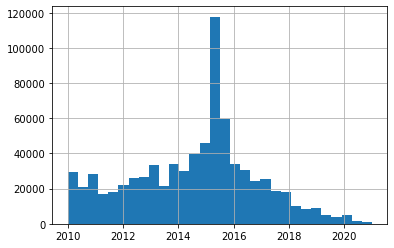

In [19]:
uo_hist_df[uo_hist_df['date_begin_corr'] >= datetime(2010, 1, 1, 0, 0)]['date_begin_corr'].hist(bins = 30);

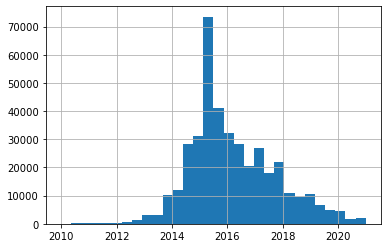

In [20]:
uo_hist_df[uo_hist_df['date_end_corr'] >= datetime(2010, 1, 1, 0, 0)]['date_end_corr'].hist(bins = 30);

## Формирование выборки

In [21]:
def convert_dt(x):
    try:
        return datetime(int(max(int(x),1900)), 1, 1, 0, 0)
    except:
        return datetime(1965, 1, 1, 0, 0)

In [22]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [24]:
mkd_num_feats = ['built_year','floor_count_max','living_quarters_count',
             'area_total','area_residential','area_land']
mkd_cat_feats = ['project_type','formalname_region','foundation_type','floor_type','wall_material',
             'hot_water_type','cold_water_type','sewerage_type','gas_type','ventilation_type']
mkd_feats = mkd_num_feats + mkd_cat_feats

In [186]:
def get_basis(dt, h = 6):
    # Базис и таргет
    beg = uo_hist_df[(uo_hist_df['date_begin_corr'] <= dt) 
                     & (uo_hist_df['date_end_corr'].fillna(datetime(2100, 1, 1, 0, 0)) > dt)]
    dt_end = dt + relativedelta(months = h)
    end = uo_hist_df[(uo_hist_df['date_begin_corr'] <= dt_end) 
                     & (uo_hist_df['date_end_corr'].fillna(datetime(2100, 1, 1, 0, 0)) > dt_end)][['uo_id','house_id']]
    end.columns = ['new_uo_id','new_house_id']
    beg = beg.merge(end, how = 'left', left_on = ['uo_id','house_id'], right_on = ['new_uo_id','new_house_id'])
    beg['response'] = beg['new_house_id'].apply(lambda x: int(x != x))
    beg['report_dt'] = dt
    beg['management_days'] = beg['report_dt'] - beg['date_begin_corr']
    
    # Информация по дому
    beg = beg.merge(mkd_df[['id'] + mkd_feats], 
                    left_on = 'house_id', right_on = 'id')
    beg['built_year_dt'] = beg['built_year'].apply(convert_dt)
    beg['house_age_days'] = beg['report_dt'] - beg['built_year_dt']
    
    # Статистика по портфелю УК
    uo_stat = uo_hist_df.merge(mkd_df[['id']], left_on = 'house_id', right_on = 'id')[['uo_id','date_begin_corr','date_end_corr']]
    uo_stat['date_end_corr'].fillna(datetime(2100, 1, 1, 0, 0), inplace = True)
    uo_stat['uo_active_houses'] = 0
    uo_stat.loc[(uo_stat['date_begin_corr'] <= dt) & (uo_stat['date_end_corr'] > dt), 'uo_active_houses'] = 1
    dt_6 = dt + relativedelta(months = -6)
    dt_12 = dt + relativedelta(months = -12)
    uo_stat['uo_lost_houses_6'] = 0
    uo_stat.loc[(uo_stat['date_end_corr'] >= dt_6) & (uo_stat['date_end_corr'] < dt), 'uo_lost_houses_6'] = 1   
    uo_stat['uo_lost_houses_12'] = 0
    uo_stat.loc[(uo_stat['date_end_corr'] >= dt_12) & (uo_stat['date_end_corr'] < dt), 'uo_lost_houses_12'] = 1
    uo_stat['uo_new_houses_6'] = 0
    uo_stat.loc[(uo_stat['date_begin_corr'] >= dt_6) & (uo_stat['date_begin_corr'] < dt), 'uo_new_houses_6'] = 1   
    uo_stat['uo_new_houses_12'] = 0
    uo_stat.loc[(uo_stat['date_begin_corr'] >= dt_12) & (uo_stat['date_begin_corr'] < dt), 'uo_new_houses_12'] = 1
    uo_stat = uo_stat.groupby('uo_id').agg({'uo_active_houses':'sum', 
                                            'uo_lost_houses_6':'sum', 'uo_lost_houses_12':'sum',
                                            'uo_new_houses_6':'sum', 'uo_new_houses_12':'sum'})
    beg = beg.merge(uo_stat, how = 'left', left_on = 'uo_id', right_index = True)
    beg['uo_lost_houses_6_ratio'] = beg['uo_lost_houses_6'] / beg['uo_active_houses']
    beg['uo_lost_houses_12_ratio'] = beg['uo_lost_houses_12'] / beg['uo_active_houses']
    beg['uo_new_houses_6_ratio'] = beg['uo_new_houses_6'] / beg['uo_active_houses']
    beg['uo_new_houses_12_ratio'] = beg['uo_new_houses_12'] / beg['uo_active_houses']
    
    # Базовая информация по УК
    beg = beg.merge(uo_df[['id','coop_flg','regdate']], how = 'left', left_on = 'uo_id', right_on = 'id')
    beg['regdate'].fillna(datetime(1990, 1, 1, 0, 0),inplace=True)
    #beg['uo_age_months'] = beg['report_dt'].apply(lambda x: 12*x.year + x.month) - beg['regdate'].apply(lambda x: 12*x.year + x.month)
    beg['uo_age'] = beg['report_dt'] - beg['regdate']
    
    for col in mkd_cat_feats:
        beg[col] = beg[col].apply(str)
    return beg

In [187]:
h = 12
r_df = []
for i in tqdm(range(3)):
    r_df.append(get_basis(datetime(2015, 1, 1, 0, 0) + relativedelta(years = i), h))
basis = pd.concat(r_df)
basis.groupby('report_dt')['response'].agg(['count','sum','mean'])

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.63s/it]


,count,sum,mean
report_dt,,,
2015-01-01,596166,101160,0.169684
2016-01-01,681812,60957,0.089404
2017-01-01,690620,51894,0.075141


In [264]:
# Разделим на train и valid на уровне управляющих организаций со стратификацией по размеру портфеля
uo_names = basis.groupby(['uo_id','report_dt'])[['uo_active_houses']].count().reset_index()
uo_names['group'] = np.ceil(np.log10(uo_names['uo_active_houses']) + 1)

# Исключаем управляющие организации с большими портфелями, т.к.: 
# характеристики УО по домам не будут различаться, а также происходит переобучение модели на train под них
uo_names = uo_names[uo_names['uo_active_houses'] < 300]
'uo_id',
train_uo, valid_uo = train_test_split(uo_names, test_size = 0.3, stratify = uo_names['group'])
train = basis.merge(train_uo[['uo_id','report_dt']], on = ['uo_id','report_dt'])
valid = basis.merge(valid_uo[['uo_id','report_dt']], on = ['uo_id','report_dt'])
print('Train shape and target rate:', train.shape, train['response'].mean())
print('Valid shape and target rate:', valid.shape, valid['response'].mean())

Train shape and target rate: (1027410, 45) 0.10841825561363039
Valid shape and target rate: (439632, 45) 0.10355251665028933


## Построение модели

In [265]:
features = ['management_days','house_age_days','uo_active_houses',
            'uo_new_houses_6', 'uo_new_houses_6_ratio',
            'uo_new_houses_12', 'uo_new_houses_12_ratio',
            'uo_lost_houses_6', 'uo_lost_houses_6_ratio',
            'uo_lost_houses_12', 'uo_lost_houses_12_ratio',
           'coop_flg','uo_age'] \
+ [x for x in mkd_feats if x not in ['built_year','project_type']]
cat_feats = [x for x in mkd_cat_feats if x not in ['built_year','project_type']]

In [320]:
features = ['management_days','house_age_days','uo_active_houses',
            'uo_new_houses_6_ratio','uo_lost_houses_12_ratio',
           'coop_flg','uo_age'] \
+ [x for x in mkd_feats if x not in ['built_year','project_type']]
cat_feats = [x for x in mkd_cat_feats if x not in ['built_year','project_type']]

In [266]:
gini = dict()
feats = []
for col in features:
    if col not in cat_feats:
        feats.append(col)
        t = train[['response',col]][~train[col].isnull()]
        gini[col] = np.abs(2*roc_auc_score(t['response'], t[col]) - 1)
gini = pd.Series(gini).sort_values()

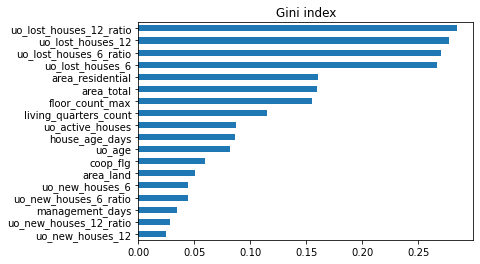

In [267]:
gini.plot(kind = 'barh', title = 'Gini index');

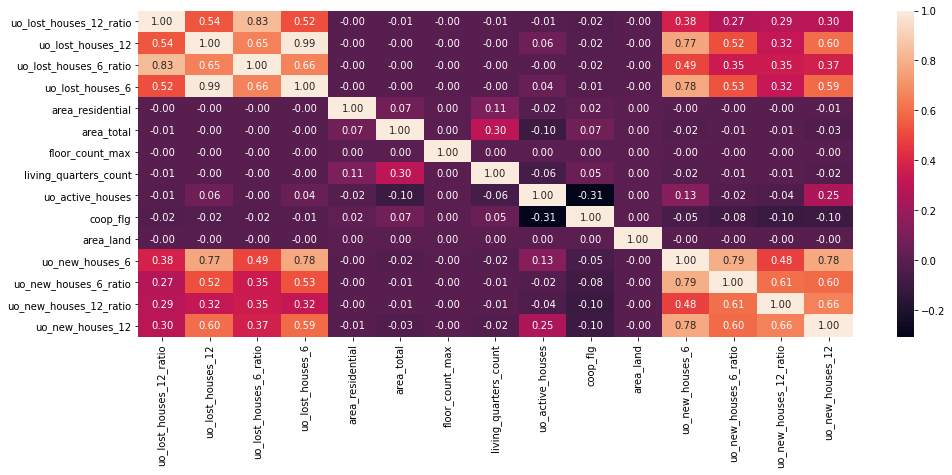

In [268]:
plt.figure(figsize=(16, 6))
sns.heatmap(train[gini.index[::-1]].corr(), annot = True, fmt='.2f');

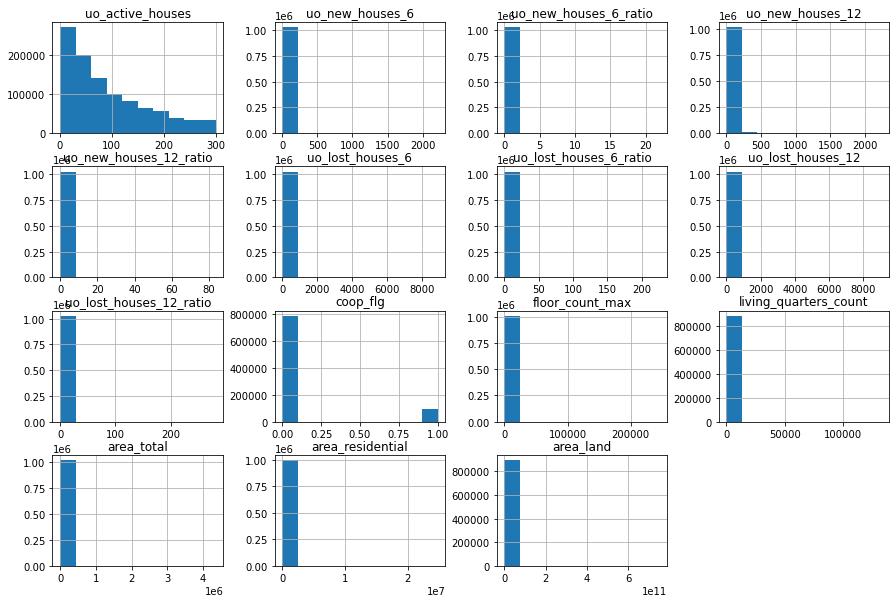

In [269]:
train[features].hist(figsize = (15,10));

In [409]:
# Используем деревья малой глубины для сокращения переобучения
cur_time = time()
model_cb = CatBoostClassifier(iterations = 200, verbose = False, depth = 2, cat_features = cat_feats,
                              min_child_samples = 10000, od_pval = 0.05)
model_cb.fit(train[features], train['response'], 
          eval_set = (valid[features], valid['response']),
          use_best_model = True)
print('Time elapsed:', time() - cur_time)
print('Best iteration:', model_cb.best_iteration_)

Time elapsed: 59.68170404434204
Best iteration: 81


In [410]:
# Проверка на коротком списке фичей
cur_time = time()
feats = ['uo_lost_houses_12_ratio','uo_age','coop_flg',
         'house_age_days','area_total','living_quarters_count','floor_count_max'
         ]
model_cb = CatBoostClassifier(iterations = 200, verbose = False, depth = 2, #cat_features = ['ventilation_type'],
                              min_child_samples = 10000, od_pval = 0.05)
model_cb.fit(train[feats], train['response'], 
          eval_set = (valid[feats], valid['response']),
          use_best_model = True)
print('Time elapsed:', time() - cur_time)
print('Best iteration:', model_cb.best_iteration_)

Time elapsed: 11.272591590881348
Best iteration: 61


In [408]:
cur_time = time()

cv_dataset = Pool(data=basis[basis['uo_active_houses'] < 300][features],
                  label=basis[basis['uo_active_houses'] < 300]['response'],
                  cat_features=cat_feats)

params = {"iterations": 500,
          "depth": 2,
          "loss_function": "Logloss",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=5, 
            plot="True")

print('Time elapsed:', time() - cur_time)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.301454345
bestIteration = 499

Training on fold [1/5]

bestTest = 0.3002111386
bestIteration = 499

Training on fold [2/5]

bestTest = 0.3008699311
bestIteration = 499

Training on fold [3/5]

bestTest = 0.2992256816
bestIteration = 499

Training on fold [4/5]

bestTest = 0.3008096344
bestIteration = 499

Time elapsed: 696.117427110672


In [331]:
mkd_feats

['built_year',
 'floor_count_max',
 'living_quarters_count',
 'area_total',
 'area_residential',
 'area_land',
 'project_type',
 'formalname_region',
 'foundation_type',
 'floor_type',
 'wall_material',
 'hot_water_type',
 'cold_water_type',
 'sewerage_type',
 'gas_type',
 'ventilation_type']

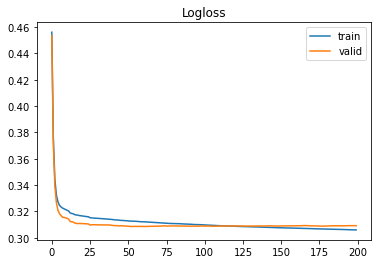

In [379]:
ax = plt.axes()
plt.plot(model_cb.evals_result_['learn']['Logloss'], label = 'train')
plt.plot(model_cb.evals_result_['validation']['Logloss'], label = 'valid')
plt.title('Logloss')
ax.legend();

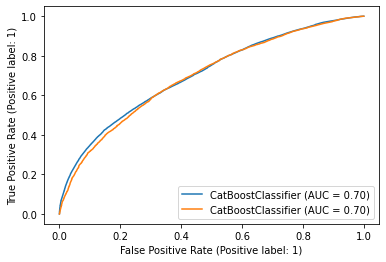

In [380]:
plot_roc_curve(model_cb, train[feats], train['response'])
plot_roc_curve(model_cb, valid[feats], valid['response'], ax = plt.gca());

In [364]:
train.groupby('ventilation_type').agg({'response':['count','sum','mean']})\
.sort_values(('response','count'), ascending = False).head(20)

#formalname_region

response                 
                                count    sum      mean
ventilation_type                                      
Вытяжная вентиляция            357844  33960  0.094902
Приточно-вытяжная вентиляция   355947  35713  0.100332
Не заполнено                   159187  22931  0.144051
Отсутствует                     78113  10985  0.140630
Приточная вентиляция            76319   7801  0.102216

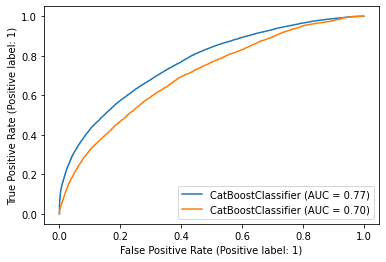

In [323]:
plot_roc_curve(model_cb, train[features], train['response'])
plot_roc_curve(model_cb, valid[features], valid['response'], ax = plt.gca());

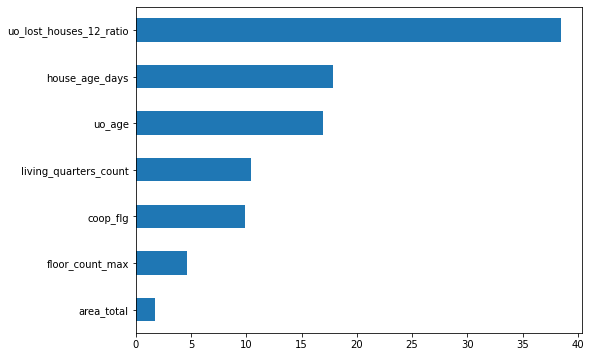

In [411]:
# Основной вклад в прогноз дает статистика по управляющей организации
pd.Series(model_cb.get_feature_importance(), index = feats).sort_values().plot(kind = 'barh', figsize = (8, 6));